## Imports

In [10]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Enable reload of Python modules without Kernel Restart
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CODE

### Load Data

In [12]:
# Working on Data Locally
csv_path = '/home/kaym/code/KayMe1/07-ML-Ops/prelectureMLops/Raw_Data'
raw_data = pd.read_csv(os.path.join(csv_path,"query_2009-01-01_2015-01-01_200k.csv"))
raw_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.2,2009-01-01 01:14:44+00:00,-73.982410,40.782397,-73.978177,40.783295,1
1,11.8,2009-01-01 03:51:05+00:00,-74.006797,40.716359,-73.978616,40.752433,2
2,26.6,2009-01-01 04:23:00+00:00,-73.982930,40.742167,-73.896904,40.843012,1
3,19.8,2009-01-01 04:49:52+00:00,-73.983822,40.729471,-73.982300,40.776622,2
4,3.4,2009-01-01 05:04:41+00:00,-74.013008,40.706021,-74.012851,40.702645,1


### Data First Look

In [13]:
# Column Names to List
column_names = raw_data.columns.tolist()
column_names

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [14]:
def explore_dataframe(df):
    # Create a summary DataFrame with Exploration Results
    summary_df = pd.DataFrame({
        'column_name': df.columns,                 # Column names
        'dtype': df.dtypes,                        # Data types
        'count': [df[col].count() for col in df.columns],  # Count of Valid Values
        'n_unique': df.nunique(),                  # Number of unique values
        'n_missing': df.isna().sum(),              # Number of missing values (NaNs)
        'n_zeros': [(df[col] == 0).sum() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns],  # Number of zeros (for numeric columns)
        'min': [df[col].min() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns],  # Min value (numeric columns only)
        'max': [df[col].max() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns],  # Max value (numeric columns only)
        'mean': [df[col].mean() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns]  # Mean (numeric columns only)
    })

    return summary_df

summary_df = explore_dataframe(raw_data)

In [15]:
summary_df.reset_index(drop=True,inplace=True)
summary_df

,column_name,dtype,count,n_unique,n_missing,n_zeros,min,max,mean
0,fare_amount,float64,90743,836,0,0.0,-2.500000,208.000000,11.184033
1,pickup_datetime,object,90743,89904,0,NaN,NaN,NaN,NaN
2,pickup_longitude,float64,90743,46262,0,1702.0,-736.583333,169.972765,-72.515382
3,pickup_latitude,float64,90743,51502,0,1695.0,-74.009777,1963.515858,39.943378
4,dropoff_longitude,float64,90743,48779,0,1699.0,-1749.704532,169.972765,-72.532666
5,dropoff_latitude,float64,90743,54205,0,1696.0,-74.015157,1963.515858,39.941231
6,passenger_count,int64,90743,7,0,320.0,0.000000,6.000000,1.683149


--> No Missing Values To Clean / No Duplicates in Column Names

### Inspecting Features

In [16]:
raw_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,90743.000000,90743.000000,90743.000000,90743.000000,90743.000000,90743.000000
mean,11.184033,-72.515382,39.943378,-72.532666,39.941231,1.683149
std,9.550824,10.696278,8.880565,12.055413,8.878703,1.303741
min,-2.500000,-736.583333,-74.009777,-1749.704532,-74.015157,0.000000
25%,6.000000,-73.992067,40.735081,-73.991378,40.734218,1.000000
50%,8.500000,-73.981852,40.752687,-73.980203,40.753308,1.000000
75%,12.500000,-73.967212,40.767072,-73.963797,40.767990,2.000000
max,208.000000,169.972765,1963.515858,169.972765,1963.515858,6.000000


In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90743 entries, 0 to 90742
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        90743 non-null  float64
 1   pickup_datetime    90743 non-null  object 
 2   pickup_longitude   90743 non-null  float64
 3   pickup_latitude    90743 non-null  float64
 4   dropoff_longitude  90743 non-null  float64
 5   dropoff_latitude   90743 non-null  float64
 6   passenger_count    90743 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 4.8+ MB


In [18]:
# Coordinate Columns to exclude from distribution
coordinate_columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

# defining numeric columns ( with exclusion )
numeric_columns = [col for col in raw_data.select_dtypes(exclude=["object"]).columns if col not in coordinate_columns]
numeric_columns

['fare_amount', 'passenger_count']

----- Distribution of fare_amount : -----


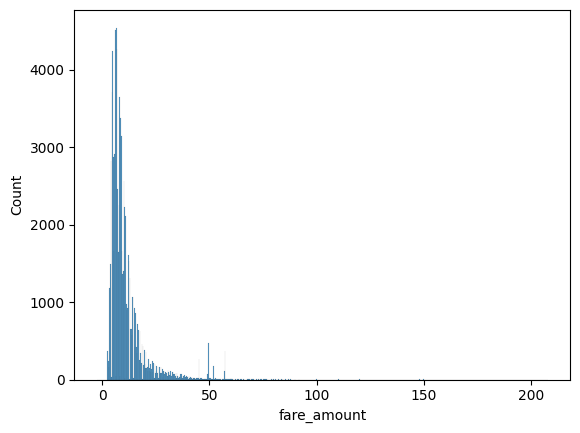

----- Distribution of passenger_count : -----


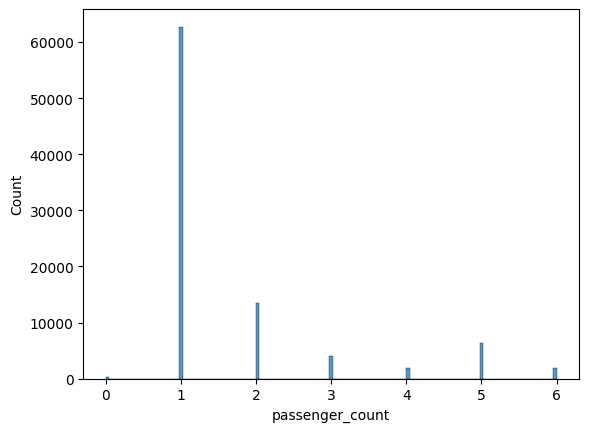

In [19]:
# Plot distribution for the numerical features  available in the dataset
for variable in numeric_columns:
    print(f"----- Distribution of {variable} : -----")
    sns.histplot(raw_data[variable])
    plt.show()

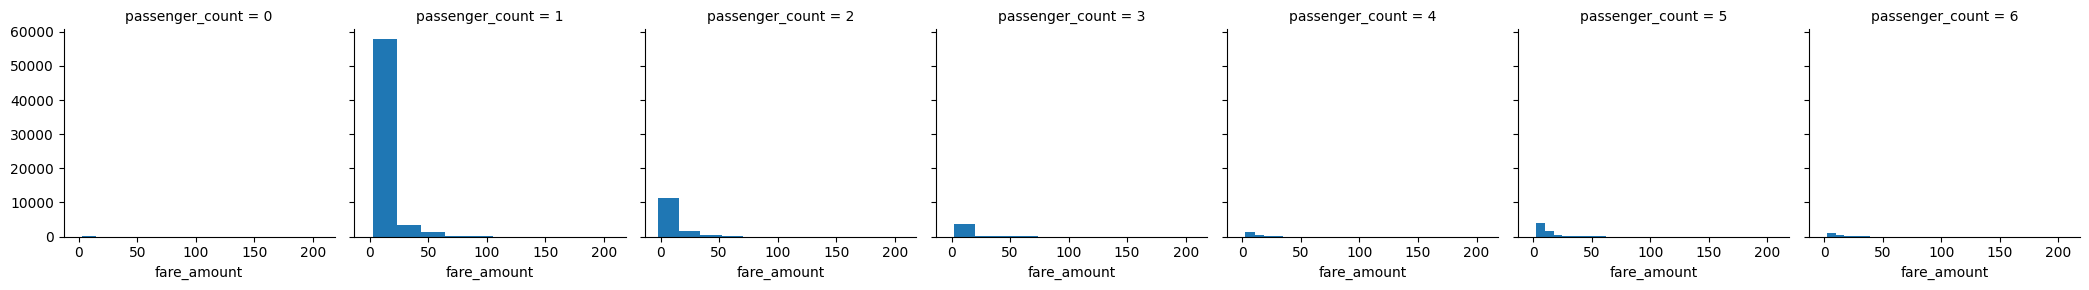

In [20]:
# FacetGrid of histograms for each passenger_count vs. fare_amount
g = sns.FacetGrid(data=raw_data, col="passenger_count")
g.map(plt.hist, "fare_amount")

Kernel Density Estimate (KDE) Interpretation : 
- Peaks in the KDE plot represent areas where the data is concentrated (where values occur more frequently).
- The area under the KDE curve represents the total probability, which sums to 1, similar to a histogram's total bar height.
- It’s useful for understanding the distribution of continuous data and is smoother than a histogram.

----- Distribution of fare_amount : -----


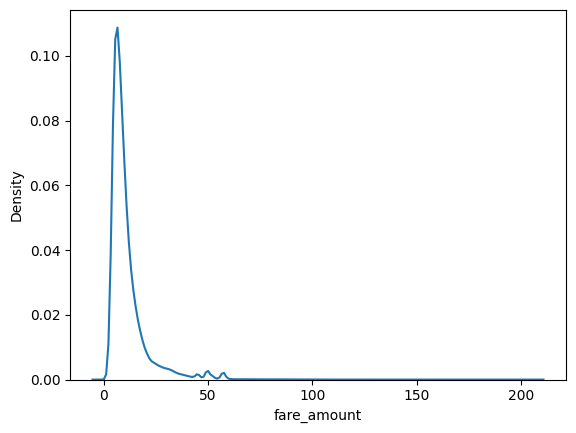

----- Distribution of pickup_longitude : -----


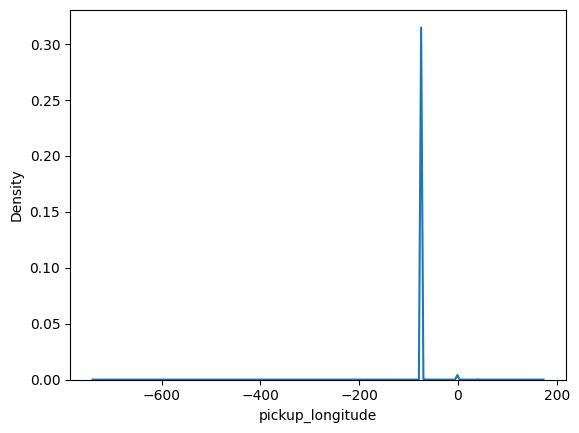

----- Distribution of pickup_latitude : -----


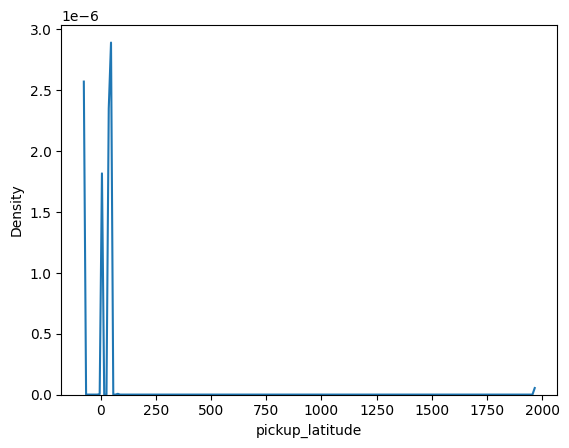

----- Distribution of dropoff_longitude : -----


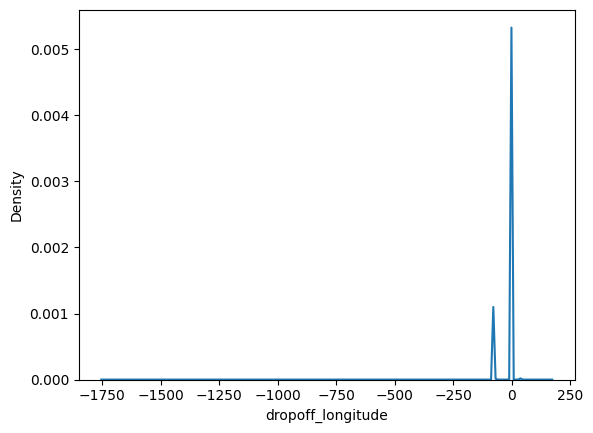

----- Distribution of dropoff_latitude : -----


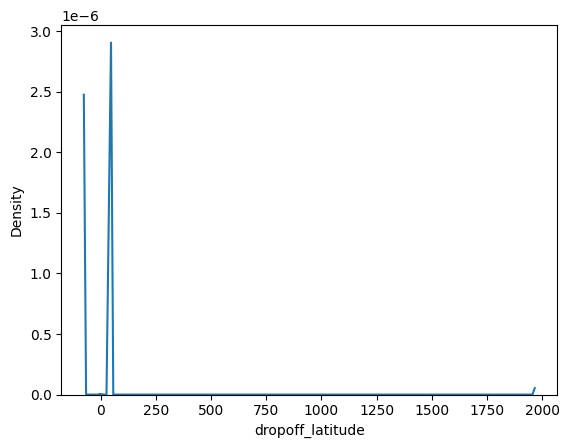

----- Distribution of passenger_count : -----


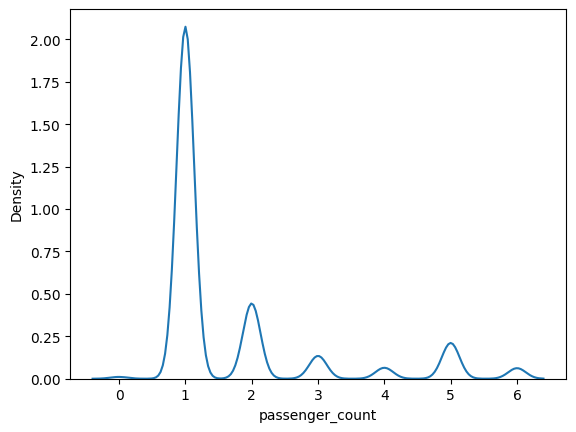

In [21]:
# Kernel Density Estimate (KDE) plot for understanding the distribution of continuous data
for variable in raw_data.select_dtypes(exclude=["object"]).columns:
    print(f"----- Distribution of {variable} : -----")
    sns.kdeplot(raw_data[variable])
    plt.show()

Heatmaps to visualize the correlation between different variables in a dataset --> Explore relationship among numeric values.
- Positive -> when one variable increases, the other one also increases
- Neutral (0) -> No correlation
- Negative -> when one variable increases, the other one decreases

<Axes: >

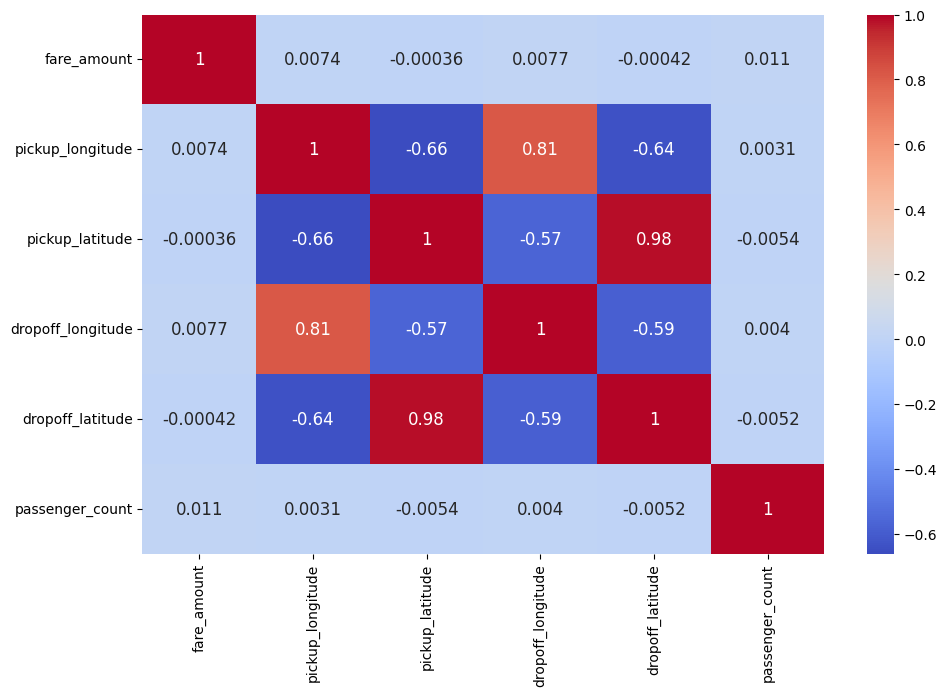

In [22]:
nodate_data = raw_data.select_dtypes(exclude=["object"])

# Correlation plot
plt.figure(figsize=(11,7))
sns.heatmap(
    nodate_data.corr(),
    cmap='coolwarm',
    annot = True,
    annot_kws={"size": 12})

Well Correlated : 
- [POSITIVE 0.81] pickup_longitude / dropoff_longitude 
- [POSITIVE 0.98] dropoff_latitude / pickup_latitude

### Distance from Lat/Long

The Haversine formula : calculates the shortest distance between two points on the Earth's surface using their latitudes and longitudes --> It accounts for the Earth's curvature

In [23]:
# Copying data to keep Raw Data Unchanged
data_with_distance = raw_data.copy()

# Function using Haversine formula to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    # degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of Earth in kilometers
    r = 6371
    return c * r

# Apply the function to calculate the distance for each row
data_with_distance['distance_haversine_km'] = haversine(
    data_with_distance['pickup_latitude'],
    data_with_distance['pickup_longitude'],
    data_with_distance['dropoff_latitude'],
    data_with_distance['dropoff_longitude']
)


data_with_distance.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_haversine_km
0,4.2,2009-01-01 01:14:44+00:00,-73.982410,40.782397,-73.978177,40.783295,1,0.370124
1,11.8,2009-01-01 03:51:05+00:00,-74.006797,40.716359,-73.978616,40.752433,2,4.661342
2,26.6,2009-01-01 04:23:00+00:00,-73.982930,40.742167,-73.896904,40.843012,1,13.348688
3,19.8,2009-01-01 04:49:52+00:00,-73.983822,40.729471,-73.982300,40.776622,2,5.244519
4,3.4,2009-01-01 05:04:41+00:00,-74.013008,40.706021,-74.012851,40.702645,1,0.375627


 Euclidian Distance : assuming a flat plane, calculates the shortest distance between two points on the Earth's surface using their latitudes and longitudes -> ignores Earth's curvature
 - @@ Result in degrees --> Need to convert Lat and long first from degrees to km 
 - > 1 degree of latitude is approximately 111 km.
 - > 1 degree of longitude varies based on latitude ( x cos(lat))

In [24]:
# Function to calculate Euclidean distance
def euclidean(lat1, lon1, lat2, lon2):
    # Euclidean distance formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    return np.sqrt(dlat**2 + dlon**2)

# Apply the function to calculate the Euclidean distance for each row
data_with_distance['distance_euclidean_degrees'] = euclidean(
    data_with_distance['pickup_latitude'],
    data_with_distance['pickup_longitude'],
    data_with_distance['dropoff_latitude'],
    data_with_distance['dropoff_longitude']
)

data_with_distance.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_haversine_km,distance_euclidean_degrees
0,4.2,2009-01-01 01:14:44+00:00,-73.982410,40.782397,-73.978177,40.783295,1,0.370124,0.004327
1,11.8,2009-01-01 03:51:05+00:00,-74.006797,40.716359,-73.978616,40.752433,2,4.661342,0.045777
2,26.6,2009-01-01 04:23:00+00:00,-73.982930,40.742167,-73.896904,40.843012,1,13.348688,0.132553
3,19.8,2009-01-01 04:49:52+00:00,-73.983822,40.729471,-73.982300,40.776622,2,5.244519,0.047176
4,3.4,2009-01-01 05:04:41+00:00,-74.013008,40.706021,-74.012851,40.702645,1,0.375627,0.003380


Euclidian Distance in KM 

In [25]:
def degrees_to_km(lat_diff, lon_diff, latitude):
    # Convert latitude difference to kilometers
    lat_km = lat_diff * 111

    # Convert longitude difference to kilometers
    lon_km = lon_diff * 111 * np.cos(np.radians(latitude))

    return lat_km, lon_km

In [26]:
# Function to calculate Euclidean distance in kilometers using APPROXIMATE conversion
def euclidean_km_approx(lat1, lon1, lat2, lon2):
    # Calculate differences in degrees
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Convert degrees to kilometers
    lat_km, lon_km = degrees_to_km(dlat, dlon, lat1)

    # Euclidean distance formula
    return np.sqrt(lat_km**2 + lon_km**2)

# Apply the function to calculate the Euclidean distance for each row
data_with_distance['distance_euclidean_km'] = euclidean_km_approx(
    data_with_distance['pickup_latitude'],
    data_with_distance['pickup_longitude'],
    data_with_distance['dropoff_latitude'],
    data_with_distance['dropoff_longitude']
)

data_with_distance.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_haversine_km,distance_euclidean_degrees,distance_euclidean_km
0,4.2,2009-01-01 01:14:44+00:00,-73.982410,40.782397,-73.978177,40.783295,1,0.370124,0.004327,0.369478
1,11.8,2009-01-01 03:51:05+00:00,-74.006797,40.716359,-73.978616,40.752433,2,4.661342,0.045777,4.653498
2,26.6,2009-01-01 04:23:00+00:00,-73.982930,40.742167,-73.896904,40.843012,1,13.348688,0.132553,13.328267
3,19.8,2009-01-01 04:49:52+00:00,-73.983822,40.729471,-73.982300,40.776622,2,5.244519,0.047176,5.235327
4,3.4,2009-01-01 05:04:41+00:00,-74.013008,40.706021,-74.012851,40.702645,1,0.375627,0.003380,0.374969


> Comparing Haversine & Euclidean Distance --> Partial Similarity : Either can be used

### Pickup Date to Datetime

In [27]:
# redefining numeric columns ( with exclusion )
numeric_columns = [col for col in data_with_distance.select_dtypes(exclude=["object"]).columns if col not in coordinate_columns]
numeric_columns

['fare_amount',
 'passenger_count',
 'distance_haversine_km',
 'distance_euclidean_degrees',
 'distance_euclidean_km']

In [28]:
# New Dataframe based on data_with_distance
data_converted = data_with_distance.copy()

# Convert 'pickup_datetime'to datetime format
data_converted['pickup_datetime'] = pd.to_datetime(data_converted['pickup_datetime'])

data_converted.dtypes

# data_converted.head()

fare_amount                               float64
pickup_datetime               datetime64[ns, UTC]
pickup_longitude                          float64
pickup_latitude                           float64
dropoff_longitude                         float64
dropoff_latitude                          float64
passenger_count                             int64
distance_haversine_km                     float64
distance_euclidean_degrees                float64
distance_euclidean_km                     float64
dtype: object

In [29]:
# Extracting parts of the datetime
data_converted['pickup_year'] = data_converted['pickup_datetime'].dt.year
data_converted['pickup_month'] = data_converted['pickup_datetime'].dt.month
data_converted['pickup_day'] = data_converted['pickup_datetime'].dt.day
data_converted['pickup_hour'] = data_converted['pickup_datetime'].dt.hour

data_converted.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_haversine_km,distance_euclidean_degrees,distance_euclidean_km,pickup_year,pickup_month,pickup_day,pickup_hour
0,4.2,2009-01-01 01:14:44+00:00,-73.982410,40.782397,-73.978177,40.783295,1,0.370124,0.004327,0.369478,2009,1,1,1
1,11.8,2009-01-01 03:51:05+00:00,-74.006797,40.716359,-73.978616,40.752433,2,4.661342,0.045777,4.653498,2009,1,1,3
2,26.6,2009-01-01 04:23:00+00:00,-73.982930,40.742167,-73.896904,40.843012,1,13.348688,0.132553,13.328267,2009,1,1,4
3,19.8,2009-01-01 04:49:52+00:00,-73.983822,40.729471,-73.982300,40.776622,2,5.244519,0.047176,5.235327,2009,1,1,4
4,3.4,2009-01-01 05:04:41+00:00,-74.013008,40.706021,-74.012851,40.702645,1,0.375627,0.003380,0.374969,2009,1,1,5


In [30]:
# Dropping Distance_Euclidean_Degrees
data_transformed = data_converted.drop(columns=["distance_euclidean_degrees",
                                                "distance_euclidean_km",
                                                "pickup_datetime",
                                                "pickup_longitude",
                                                "pickup_latitude",
                                                "dropoff_longitude",
                                                "dropoff_latitude"])
data_transformed.head()

,fare_amount,passenger_count,distance_haversine_km,pickup_year,pickup_month,pickup_day,pickup_hour
0,4.2,1,0.370124,2009,1,1,1
1,11.8,2,4.661342,2009,1,1,3
2,26.6,1,13.348688,2009,1,1,4
3,19.8,2,5.244519,2009,1,1,4
4,3.4,1,0.375627,2009,1,1,5


In [31]:
# Function to classify as day or night
def classify_day_night(hour):
    if 7 <= hour <= 20:
        return 'day'
    else:
        return 'night'

# Apply the function to new 'pickup_hour' column
data_transformed['pickup_period'] = data_transformed['pickup_hour'].apply(classify_day_night)

data_transformed.head()

,fare_amount,passenger_count,distance_haversine_km,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_period
0,4.2,1,0.370124,2009,1,1,1,night
1,11.8,2,4.661342,2009,1,1,3,night
2,26.6,1,13.348688,2009,1,1,4,night
3,19.8,2,5.244519,2009,1,1,4,night
4,3.4,1,0.375627,2009,1,1,5,night


In [32]:
# Calculate price per kilometer (fare_amount / distance_haversine_km)
data_transformed['price_per_km'] = data_transformed['fare_amount'] / data_transformed['distance_haversine_km']

# @@@ Distance 0 to be taken into account
datadist_nonzero = data_transformed[data_transformed["distance_haversine_km"] != 0]
datadist_nonzero


,fare_amount,passenger_count,distance_haversine_km,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_period,price_per_km
0,4.20,1,0.370124,2009,1,1,1,night,11.347537
1,11.80,2,4.661342,2009,1,1,3,night,2.531460
2,26.60,1,13.348688,2009,1,1,4,night,1.992705
3,19.80,2,5.244519,2009,1,1,4,night,3.775370
4,3.40,1,0.375627,2009,1,1,5,night,9.051526
...,...,...,...,...,...,...,...,...,...
90738,14.50,1,3.236297,2014,12,31,22,night,4.480429
90739,9.50,2,2.840641,2014,12,31,22,night,3.344316
90740,74.16,2,26.132341,2014,12,31,22,night,2.837863
90741,8.50,1,1.935664,2014,12,31,22,night,4.391257


### Inspecting Features ( new DB : data_transformed)

In [33]:
# redefining numeric columns ( with exclusion )
numeric_columns = [col for col in datadist_nonzero.select_dtypes(exclude=["object"]).columns if col not in coordinate_columns]
# Slicing List to get desired features
numeric_features = numeric_columns[:3]

numeric_features

['fare_amount', 'passenger_count', 'distance_haversine_km']

In [34]:
numeric_columns

['fare_amount',
 'passenger_count',
 'distance_haversine_km',
 'pickup_year',
 'pickup_month',
 'pickup_day',
 'pickup_hour',
 'price_per_km']

<Axes: >

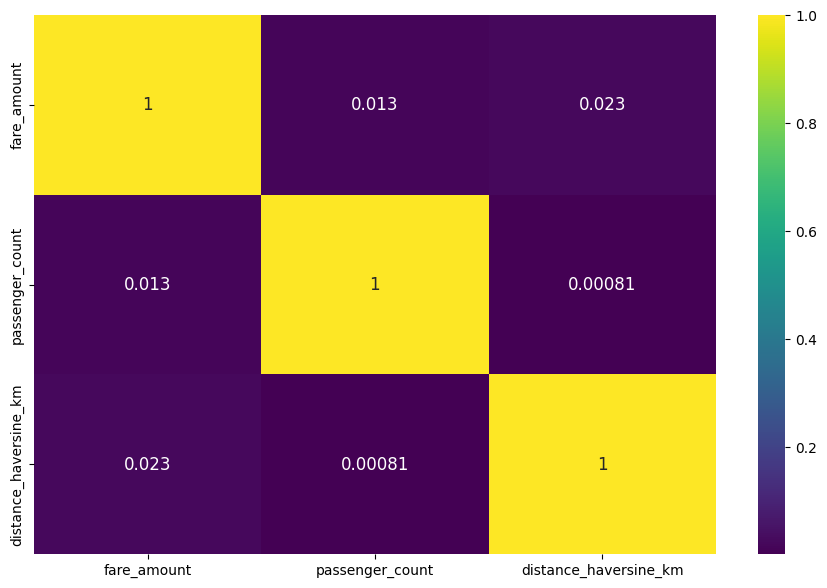

In [35]:
# Correlation plot
plt.figure(figsize=(11,7))
sns.heatmap(
    datadist_nonzero[numeric_features].corr(),
    cmap='viridis',
    annot = True,
    annot_kws={"size": 12})

In [36]:
datadist_nonzero[numeric_features].head(1000).corr()

,fare_amount,passenger_count,distance_haversine_km
fare_amount,1.000000,0.006629,0.755662
passenger_count,0.006629,1.000000,0.010323
distance_haversine_km,0.755662,0.010323,1.000000


> Good correlation between fare amount and  distance  BUT ONLY FOR 1000 first data @@@
--> Check correlation / year 

In [39]:
data_2009 = datadist_nonzero[datadist_nonzero["pickup_year"]==2009]
data_2010 = datadist_nonzero[datadist_nonzero["pickup_year"]==2010]
data_2011 = datadist_nonzero[datadist_nonzero["pickup_year"]==2011]
data_2012 = datadist_nonzero[datadist_nonzero["pickup_year"]==2012]
data_2013 = datadist_nonzero[datadist_nonzero["pickup_year"]==2013]
data_2014 = datadist_nonzero[datadist_nonzero["pickup_year"]==2014]

In [43]:
def heatmap_peryear(data):
    plt.figure(figsize=(11,7))
    sns.heatmap(
    data[numeric_features].corr(numeric_only=True),
    cmap='viridis',
    annot = True,
    annot_kws={"size": 12})

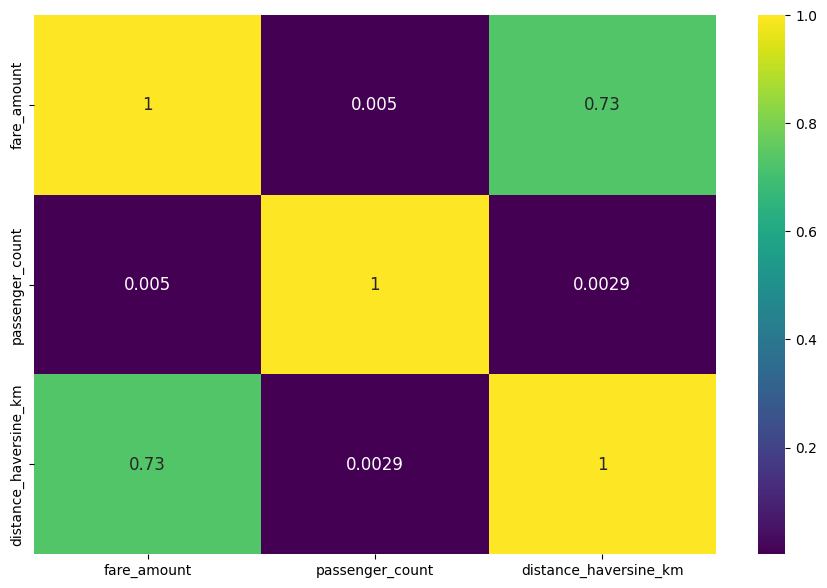

In [44]:
heatmap_peryear(data_2009)

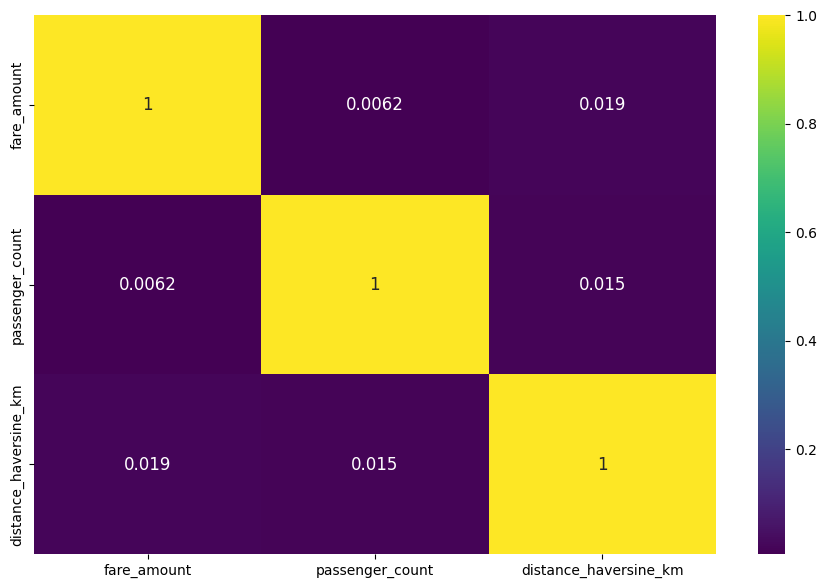

In [46]:
heatmap_peryear(data_2010)

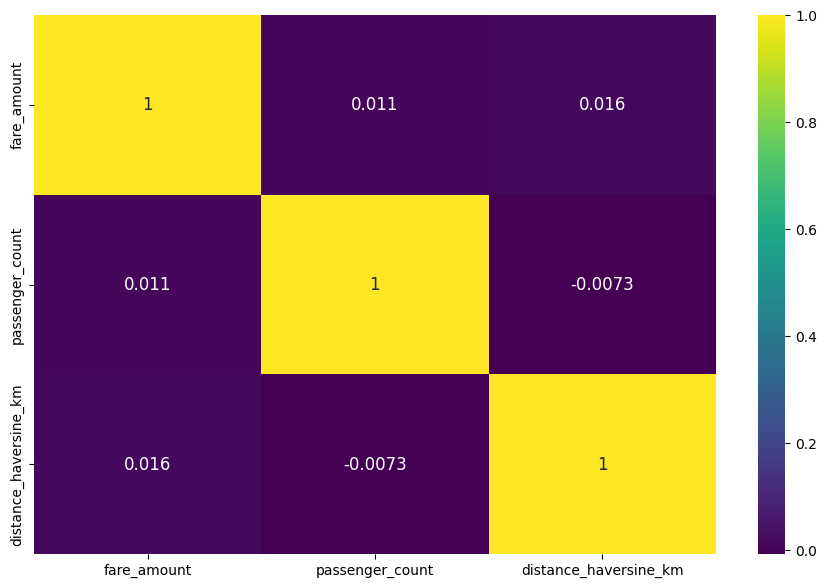

In [47]:
heatmap_peryear(data_2011)

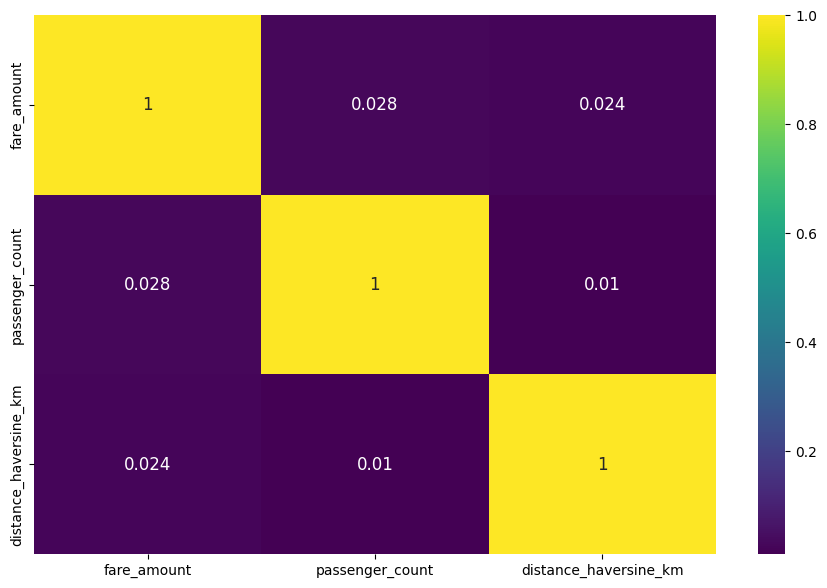

In [48]:
heatmap_peryear(data_2012)

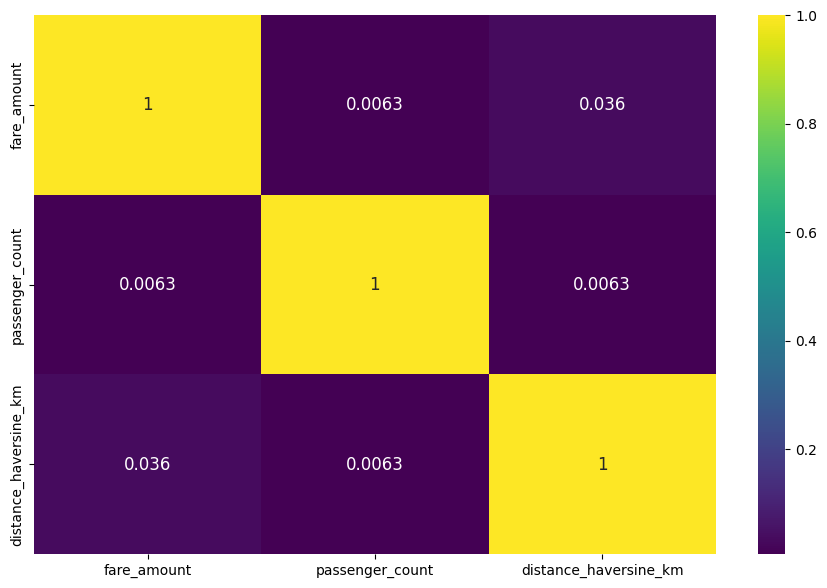

In [49]:
heatmap_peryear(data_2013)

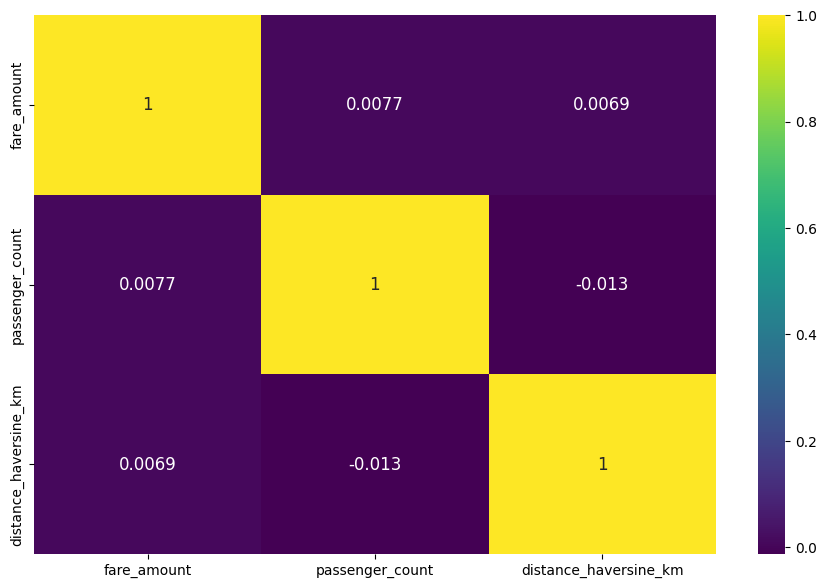

In [50]:
heatmap_peryear(data_2014)

REMARQUES 
> Correlation Between distance and fare Amount 
      ---> ONLY FOR 2009 @@@
  > No presence of Dropoff time or Datetime for more precise Analysis